# Car purchase prediction using Logistic Regression and Decision Tree Classifier

## importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ask_node_interactivity="all"

In [2]:
# reading the dataset
df=pd.read_csv(r"C:\Users\DELL\Downloads\car_data.csv")

In [3]:
# copy of the dataset
df1=df.copy()

In [4]:
# First five rows
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
# last five rows
df.tail()

,User ID,Gender,Age,AnnualSalary,Purchased
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [6]:
# no.of rows and columns
df.shape

(1000, 5)

In [7]:
# gives column names
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [8]:
# gives summary table of all numerical data
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [9]:
# gives summary table of catorical variables
df.describe(include="object")

,Gender
count,1000
unique,2
top,Female
freq,516


## Preprocessing Steps

In [10]:
### memory usage:
pre_memory=df.memory_usage().sum()

In [11]:
pre_memory

40128

In [12]:
### Customization of memory
for i in df.describe().columns:
    print(i,df[i].dtype)
    if "int" in str(df[i].dtype) :
        if df[i].min()>np.iinfo(np.int8).min  and df[i].max()<np.iinfo(np.int8).max:
            df[i]=df[i].astype(np.int8)
        elif df[i].min()>np.iinfo(np.int16).min  and df[i].max()<np.iinfo(np.int16).max:
            df[i]=df[i].astype(np.int16)
        elif df[i].min()>np.iinfo(np.int32).min  and df[i].max()<np.iinfo(np.int32).max:
            df[i]=df[i].astype(np.int32)
        elif df[i].min()>np.iinfo(np.int64).min  and df[i].max()<np.iinfo(np.int64).max:
            df[i]=df[i].astype(np.int64)
    elif "float" in str(df[i].dtypes):
        if df[i].min()> np.finfo(np.float16).min and df[i].max()<np.finfo(np.float16).max:
            df[i] =df[i].astype(np.float16)
        elif df[i].min()> np.finfo(np.float32).min and df[i].max()<np.finfo(np.float32).max:
            df[i] =df[i].astype(np.float32)
        elif df[i].min()> np.finfo(np.float64).min and df[i].max()<np.finfo(np.float64).max:
            df[i] =df[i].astype(np.float64)

User ID int64
Age int64
AnnualSalary int64
Purchased int64


In [13]:
post_memory=df.memory_usage().sum()

In [14]:
post_memory

16128

### lift calculations

In [15]:
print("pre memory used:",pre_memory)
print("post memory used:" ,post_memory)
print("total memory saved: " ,(-1)*((post_memory-pre_memory)/pre_memory)*100)

pre memory used: 40128
post memory used: 16128
total memory saved:  59.80861244019139


### checking null values

In [16]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [17]:
## no null values so need to treat the null values

### Outlier treatment

In [18]:
def outlier_treatment(x):
    for i in x.describe().columns:
        qrt1=np.quantile(x[i],0.25)
        qrt2=np.quantile(x[i],0.50)
        qrt3=np.quantile(x[i],0.75)
        iqrt=qrt3-qrt1
        utv=qrt3+1.5*(iqrt)
        ltv=qrt1-1.5*(iqrt)
        outlier_treated_values=[]
        for i in x[i]:
            if i<ltv or i>utv:
                outlier_treated_values.append(x[i].median())
            else:
                outlier_treated_values.append(i)
                return x
        x[i]=outlier_treated_values

In [19]:
outlier_treatment(df).head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


## Exploratory Data Analysis

### one catogorical variable

In [20]:
### Gender

In [21]:
df["Gender"].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [22]:
(df["Gender"].value_counts()/df.shape[0])*100

Female    51.6
Male      48.4
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

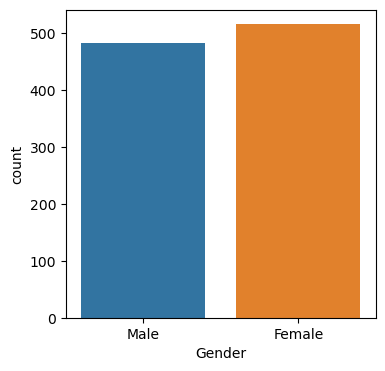

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(df["Gender"])

In [24]:
## we can see more number of people are female than compare to male

In [25]:
### Purchased

In [26]:
df["Purchased"].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [27]:
(df["Purchased"].value_counts()/df.shape[0])*100

0    59.8
1    40.2
Name: Purchased, dtype: float64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

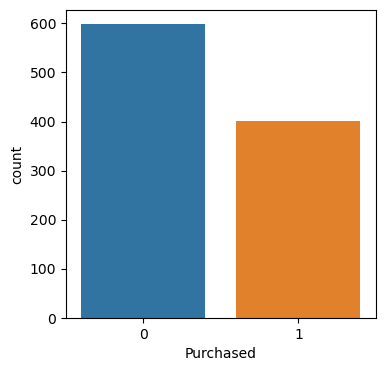

In [28]:
plt.figure(figsize=(4,4))
sns.countplot(df["Purchased"])

In [29]:
## more people dosen't buy the car, so there is a 10% difference between these two

### one_continuous variable

In [30]:
def onecontinuous(x,var,choice):
    if choice=="histplot":
        plt.figure(figsize=(7,3))
        sns.distplot(x[var],kde=False)
    else:
        sns.rugplot(x[var])

In [31]:
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

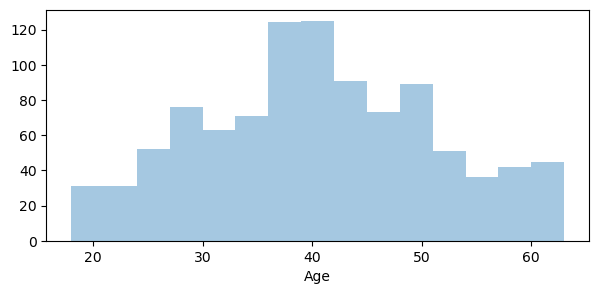

In [32]:
## Age
onecontinuous(df,"Age","histplot")

In [33]:
((df[(df['Age']<55) & (df['Age']>28)].shape[0])/(df.shape[0]))*100

72.1

In [34]:
### There are more age group from above 35 to below 47 age
### No age group below 20 years and after 65 years
### upto 72% of the people ranges from 28 to 55

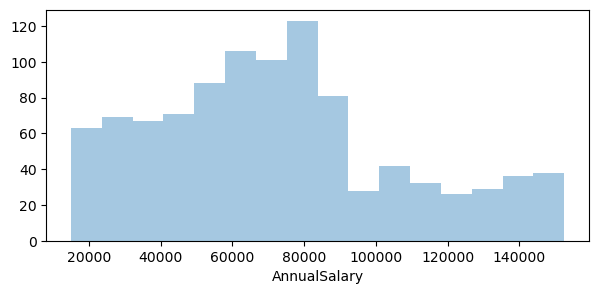

In [35]:
## AnnualSalary
onecontinuous(df,"AnnualSalary","histplot")

In [36]:
((df[(df['AnnualSalary']<85000) & (df['AnnualSalary']>20000)].shape[0])/(df.shape[0]))*100

66.5

In [37]:
## 67% employes has the salary ranges from 20000 to 85000
## we can the the maximum employes salary has around 65000 to 90000
## Less employes has salary from 90000 to 140000
## no employee has salary above 150000

### Two continuous Variables

In [38]:
def continousvariables(df,var1,var2,choice):
    if choice=='seaborn':
        plt.figure(figsize=(10,5))
        sns.scatterplot(df[var1],df[var2],color='r')
    else:
        plt.figure(figsize=(10,5))
        plt.scatter(df[var1],df[var2],color='r')

In [39]:
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

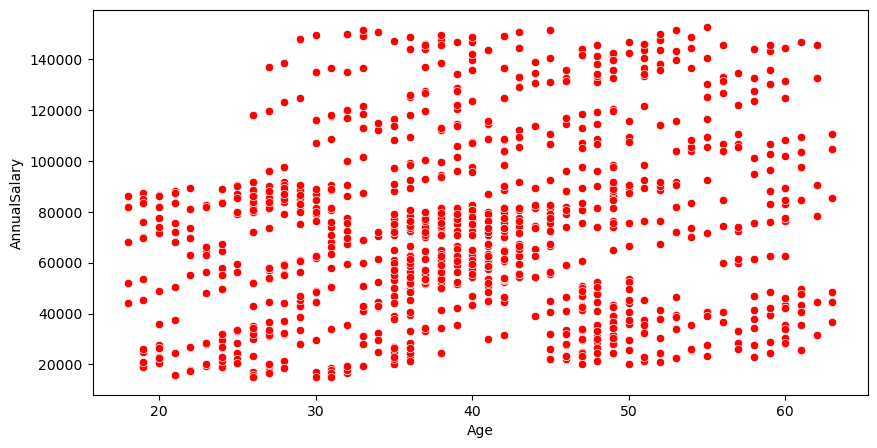

In [40]:
## Age, AnnualSalary
continousvariables(df,"Age","AnnualSalary","seaborn")

In [41]:
((df[(df["AnnualSalary"]<85000) & (df["Age"])].shape[0])/(df.shape[0]))*100

34.4

In [42]:
((df[(df["AnnualSalary"]>85000) & (df["Age"])].shape[0])/(df.shape[0]))*100

15.299999999999999

In [43]:
df["AnnualSalary"].describe()

count      1000.000000
mean      72689.000000
std       34488.341867
min       15000.000000
25%       46375.000000
50%       72000.000000
75%       90000.000000
max      152500.000000
Name: AnnualSalary, dtype: float64

In [44]:
## from overall age group the salary less than 85000 has 34% employes
## from overall age group the salary greater than 85000 has 15% employes


In [45]:
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

### Two class variables

In [46]:
def classvariables(df,var1,var2):
    plt.figure(figsize=(4,2))
    crosstab_output=pd.crosstab(df[var1],df[var2])
    return sns.heatmap(crosstab_output,annot=True,fmt='g',cmap="viridis",linecolor='white',linewidths=4)

<AxesSubplot:xlabel='Purchased', ylabel='Gender'>

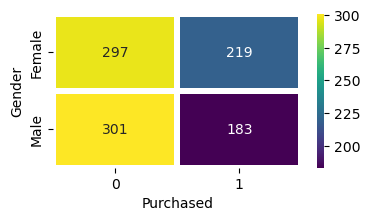

In [47]:
# Gender, Purchased
classvariables(df,"Gender","Purchased")

In [48]:
((df[(df["Purchased"]==0) & (df["Gender"]=="Male")].shape[0])/(df.shape[0]))*100

30.099999999999998

In [49]:
((df[(df["Purchased"]==1) & (df["Gender"]=="Male")].shape[0])/(df.shape[0]))*100

18.3

In [50]:
((df[(df["Purchased"]==0) & (df["Gender"]=="Female")].shape[0])/(df.shape[0]))*100

29.7

In [51]:
((df[(df["Purchased"]==1) & (df["Gender"]=="Female")].shape[0])/(df.shape[0]))*100

21.9

In [52]:
30.099999999999998 + 18.3 + 29.7 +21.9

100.0

In [53]:
30.1-18.3

11.8

In [54]:
29.7-21.9

7.800000000000001

### label encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()
le.fit(df["Gender"])
le.transform(df["Gender"])[1:5]

array([1, 1, 1, 1])

In [57]:
df["Gender"]=le.transform(df["Gender"])
## male= 1
## female= 0

In [58]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


## Splitting the data

In [59]:
x=df.drop(["User ID","Purchased"],axis=1)
y=df["Purchased"]

In [60]:
### scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
def min_max_scale(x):
    df_numerical=x[x.describe().columns]
    mn=MinMaxScaler()
    mn.fit(df_numerical)
    mn.transform(df_numerical)
    df_min_max=pd.DataFrame(mn.transform(df_numerical),columns=df_numerical.columns)
    return df_min_max

In [62]:
x=min_max_scale(x)

In [63]:
x.shape,y.shape

((1000, 3), (1000,))

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

### Appling Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred1=log_model.predict(x_test)

In [66]:
pd.DataFrame([y_pred1,y_test]).T

,0,1
0,0,0
1,0,0
2,1,1
3,1,0
4,0,0
...,...,...
295,1,0
296,1,1
297,0,0
298,0,0


In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [68]:
## checking the accuracy of Logistic regression
print(classification_report(y_test,log_model.predict(x_test)))
cm1=confusion_matrix(y_test,y_log)
print(cm1)
print(accuracy_score(y_test,y_log)

SyntaxError: unexpected EOF while parsing (1581566033.py, line 5)

## Applying Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred2 = clf.predict(x_test)

In [70]:
pd.DataFrame([y_pred2,y_test]).T

,0,1
0,0,0
1,0,0
2,1,1
3,1,0
4,0,0
...,...,...
295,1,0
296,1,1
297,1,0
298,0,0


In [71]:
## checking the accuracy of the Decision Tree Classifier
print(classification_report(y_test,log_model.predict(x_test)))
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)
print(accuracy_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       186
           1       0.79      0.71      0.75       114

    accuracy                           0.82       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.81      0.82      0.81       300

[[163  23]
 [ 18  96]]
0.8633333333333333


From the above two models Decision Tree Clasifier is giving 86% accuracy where logistic regression is giving 82% accuracy